Final Cost Function Value: 0.2253345284951801
Learned Parameters: [ 0.46691589  2.55696688 -2.78058175]


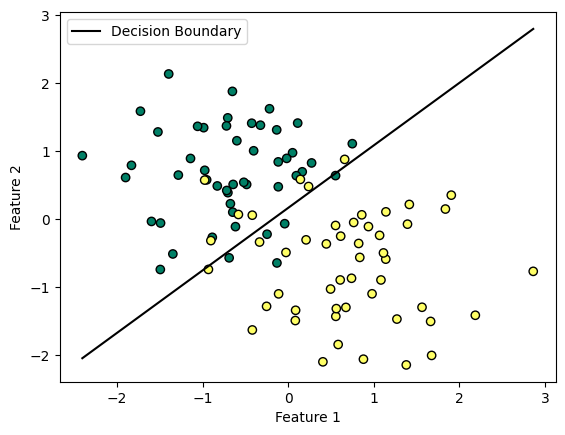

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


X = pd.read_csv("logisticX.csv").values  # Convert to numpy array
y = pd.read_csv("logisticY.csv").values  # Convert to numpy array

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iters):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history


scaler = StandardScaler()
X = scaler.fit_transform(X)
m, n = X.shape
X = np.c_[np.ones((m, 1)), X] 

# Initialize parameters
theta = np.zeros((n + 1, 1))
alpha = 0.1  # Learning rate
num_iters = 5000 


final_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)


final_cost = compute_cost(X, y, final_theta)
print("Final Cost Function Value:", final_cost)
print("Learned Parameters:", final_theta.ravel())


plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='summer', edgecolors='k')


x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'k', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

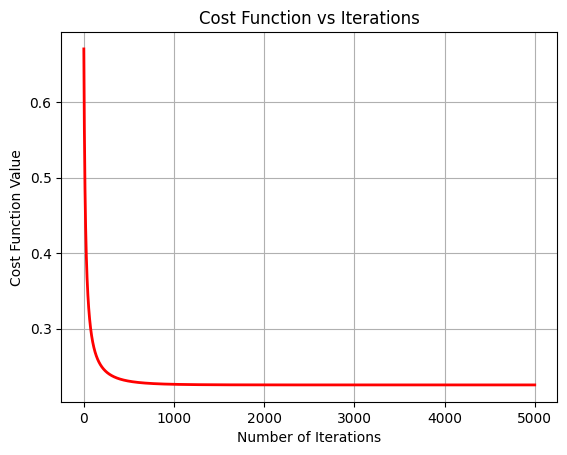

In [2]:
plt.figure()
plt.plot(range(num_iters), cost_history, 'r-', linewidth=2) 
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations")
plt.grid(True)
plt.show()

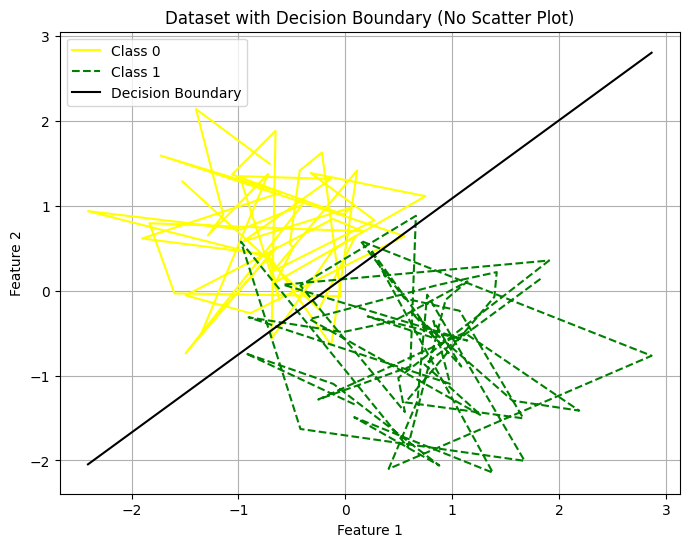

In [5]:

plt.figure(figsize=(8, 6))
class_0 = X[y.flatten() == 0]
plt.plot(class_0[:, 1], class_0[:, 2], linestyle='solid', color='yellow', label='Class 0')


class_1 = X[y.flatten() == 1]
plt.plot(class_1[:, 1], class_1[:, 2], linestyle='dashed', color='green', label='Class 1')


x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Dataset with Decision Boundary (No Scatter Plot)")
plt.grid(True)


plt.show()

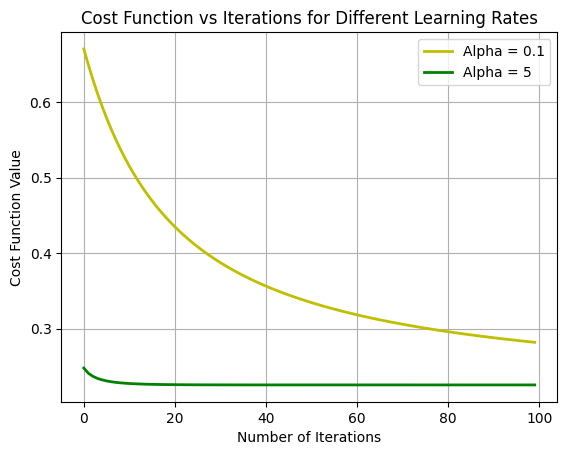

In [6]:
num_iters = 100  

# Train with alpha = 0.1
theta_1 = np.zeros((n + 1, 1))
theta_1, cost_history_1 = gradient_descent(X, y, theta_1, alpha=0.1, num_iters=num_iters)

# Train with alpha = 5
theta_2 = np.zeros((n + 1, 1))
theta_2, cost_history_2 = gradient_descent(X, y, theta_2, alpha=5, num_iters=num_iters)


plt.figure()
plt.plot(range(num_iters), cost_history_1, 'y-', label='Alpha = 0.1', linewidth=2)
plt.plot(range(num_iters), cost_history_2, 'g-', label='Alpha = 5', linewidth=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


y_pred = sigmoid(X @ final_theta) >= 0.5  

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[44  5]
 [ 7 43]]
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776
